# Exercise 1: Linear Regression

### Import

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

In [2]:
df = pd.read_csv('Data/ex1data1.txt')
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [4]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 0, 'Population of City in 10,000s')

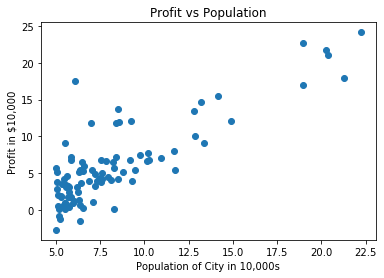

In [29]:
#fig = plt.figure()  # open a new figure
plt.plot(df[['Population']], df[['Profit']],'o')
plt.title("Profit vs Population")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')

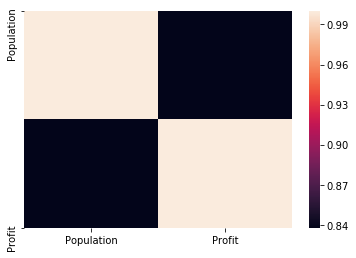

In [6]:
sns.heatmap(df.corr())

### Train Model

In [7]:
X = df[['Population']]
y = df[['Profit']]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lm = LinearRegression()

In [12]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
lm.coef_

array([[1.05499562]])

In [14]:
lm.intercept_

array([-3.03781586])

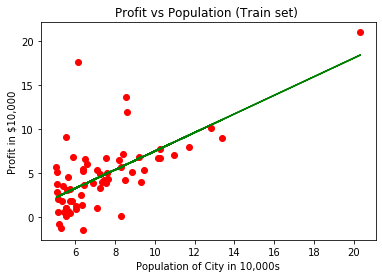

In [31]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, lm.predict(X_train), color = "green")
plt.title("Profit vs Population (Train set) ")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()

### Prediction

In [16]:
predictions = lm.predict(X_test)

Text(0.5, 0, 'Population of City in 10,000s')

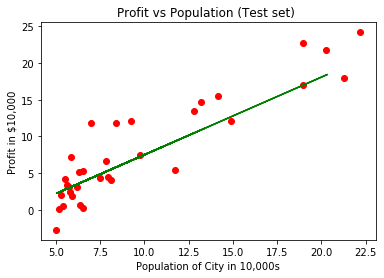

In [32]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_train,lm.predict(X_train), color = "green")
plt.title("Profit vs Population (Test set) ")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')

Text(0.5, 0, 'Population of City in 10,000s')

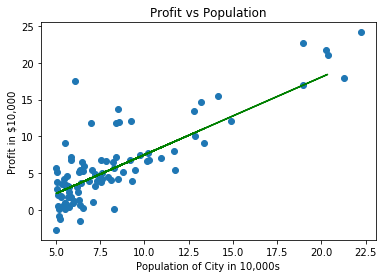

In [33]:
plt.plot(df[['Population']], df[['Profit']],'o')
plt.plot(X_train, lm.predict(X_train), color = "green")
plt.title("Profit vs Population")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')

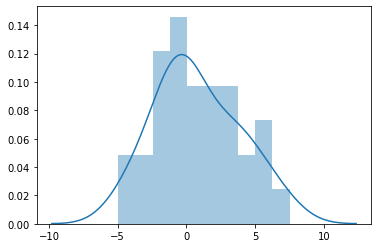

In [18]:
sns.distplot((y_test-predictions),bins=10);
#Residual Histogram

### Evaluation

In [19]:
from sklearn import metrics

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.4508665439931177
MSE: 9.770977167465363
RMSE: 3.125856229493827
